# Ανίχνευση της Θερμογένεσης του Φαιού Λιπώδους Ιστού 
## Ορισμός των μεταβλητών συστήματος 
1. Οι εικόνες βρίσκονται στο dir `/data/raw`
2. το notebook `04-intrascapular-temperatures.ipynb` βρίσκεται στο `/notebooks`
3. οπότε για να έχουμε πρόσβαση πρέπει να μεταφερθούμε στο root project directory

### Δομή package 
- `src`
    - `data`
    - `features`
    - `models`
    - `visualization`
    
### Αρχικοποίηση Notebook
- καταχωρούμε αν δεν έχουμε ήδη στο σύστημα το directory του project
- δίνουμε πρόσβαση στο σύστημα για το πχ `C:\Users\plouk\Adiposer`
- Το σύστημα για την ώρα βρίσκεται στο `C:\Users\plouk\anaconda3\python.exe`

## Εικόνες για τη γενική ανατομία του λιπώδους ιστού
### Εξέλιξη της φαιoποίησης του λευκού λιπώδους ιστού σε διαφορετικά ποντίκια υπό κρύο περιβάλλον
Στην εικόνα οι υποδόριες και σπλαχνικές αποθήκες τεμαχίστηκαν και τοποθετήθηκαν σε ένα πρότυπο ποντικιού ώστε να φανεί η σχετική τοποθεσία τους στο σώμα. 
Το ποντίκι στα αριστερά διατηρήθηκε σε θερμοκρασίες κοντά στη θερμο-ουδετερότητα (28℃ για 10 ημέρες), ενώ το ποντίκι στα δεξιά προσαρμόστηκε σε κρύο περιβάλλον (6℃ για 10 ημέρες). Η φαιοποίηση του λιπώδους οργάνου είναι εμφανής στον θερμικά προσαρμοσμένο ποντίκι. 
* Το λιπώδες όργανο αποτελείται από δυο υποδόριες αποθήκες: 
    - (Α) πρόσθια (βαθιά αυχενική, επιφανειακή αυχενική, ενδοκεφαλική, υποκεφαλική, αξιλο-θωρακική) 
    - (F) οπίσθια (ραχιαίος-οσφυϊκός, βουβωνικός, γλουτιαίος), 
    - και από αρκετές σπλαχνικές αποθήκες: 
        - (Β) μεσοθωρακικό, 
        - (C) μεσεντερικό, 
        - (D) ρετρό-περιτοναϊκό και
        - (Ε) κοιλιακό-πυελικό (περινεναλικός, περιατοβαρικός, παραμετρικός, περικοκικός).

Ράβδος κλίμακας: 1 cm. Το λιπώδες όργανο των ποντικών Sv129 περιέχει τον επιπολασμό των καφέ λιποκυττάρων και δείχνει την πλαστικότητα μετά από κρύα έκθεση. 
![ανατομική εικόνα](img/giorgano.png)

### Περιοχές ενδιαφέροντος 
| WAT Location            | BAT Location |
| ------------------------- | ------------------------- |
| ![something](img/wat_location.jpg)  | ![something](img/bat_location.jpg) |

In [109]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [110]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob

from skimage.exposure import histogram
from skimage.util import img_as_ubyte

from src.features import mouse_detection
from src.data import initial_data_pick

In [7]:
infrared_images = [] # stores (238, 98) arrays etc
items = glob(module_path + '/data/raw/0h/mouse_1/IR_*')
for item in items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # stores (240, 160) arrays
items = glob(module_path + '/data/raw/0h/mouse_1/CSV_*')
for item in items:
    csv_files.append(initial_data_pick.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]

new = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

<AxesSubplot:title={'center':'Thermal Image'}>

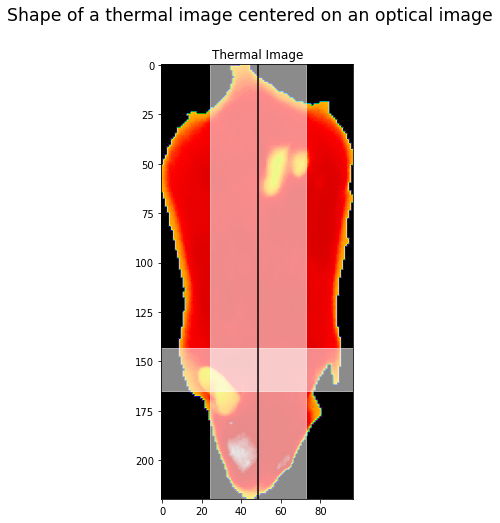

In [8]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Shape of a thermal image centered on an optical image', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

ax0.imshow(X=new[0], cmap=plt.cm.nipy_spectral)
ax0.axvline(x=new[0].shape[1]/2, c='black')
#ax0.axvline(x=new[0].shape[1]/2, c='red')
ax0.axvspan(xmin=0.25*new[0].shape[1], xmax=0.75*new[0].shape[1], color='white', alpha=0.55)
ax0.axhspan(ymin=0.65*new[0].shape[0], ymax=0.75*new[0].shape[0], color='white', alpha=0.55)
#ax0.axhline(y=new[0].shape[0]/2 + infrared_images[0].shape[0], c='yellow')
#ax0.axhline(y=optical_images[0].shape[0]/2 - infrared_images[0].shape[0], c='green')
ax0.set_title(label='Thermal Image')
fig.add_subplot(ax0)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 20.50it/s]


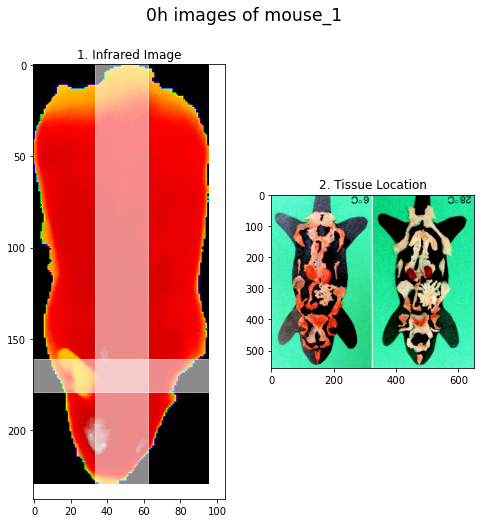

In [107]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='0h images of mouse_1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax0.set_title(label='1. Infrared Image')
ax1.set_title(label='2. Tissue Location')
camera = Camera(fig)
for image in tqdm(new):
    ax1.imshow(X=imread('img/tissues.png'))
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=500)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

### Επιλογή εικόνων για καταγραφή της αυχενικής θερμοκρασίας
Στο αρχείο bat_list.yml έχουμε ορίσει από ποιες εικόνες θα καταγράψουμε τη μέση θερμοκρασία ενός τετραγωνικού patch το οποίο βρίσκεται στον αυχένα ενός ποντικιού, όπως φαίνεται στην παραπάνω εικόνα. 

Δομή του αρχείου yaml: 
```
samples: [0h, 24h, 48h, 72h, 96h, 120h, 144h, 192h, 240h]
mouse_1:
  csv: [CSV_2060.csv, CSV_2305.csv, CSV_2509.csv, CSV_2730.csv, CSV_2957.csv, CSV_3181.csv, CSV_3397.csv, CSV_3652.csv, CSV_3855.csv]
  jpeg: [IR_2060.jpg, IR_2305.jpg, IR_2509.jpg, IR_2730.jpg, IR_2957.jpg, IR_3181.jpg, IR_3397.jpg, IR_3652.jpg, IR_3855.jpg]
.
.
. κλπ
  ```

In [163]:
# Εισαγωγή του αρχείου
import yaml
with open(module_path + '/data/bat_list.yml') as file:
    experiment = yaml.load(file, Loader=yaml.FullLoader)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 221.83it/s]


sample: #8 shape: (19, 36), area: 684 30.200315789473688
sample: #8 shape: (19, 29), area: 551 32.074197822141564
sample: #8 shape: (19, 30), area: 570 31.398110526315794
sample: #8 shape: (18, 31), area: 558 32.912374551971325
sample: #8 shape: (19, 31), area: 589 32.127483870967744
sample: #8 shape: (19, 32), area: 608 32.82530263157895
sample: #8 shape: (19, 30), area: 570 31.977445614035087
sample: #8 shape: (18, 30), area: 540 32.79122407407408
sample: #8 shape: (19, 32), area: 608 32.574179276315796


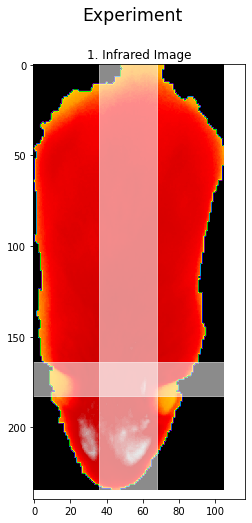

In [164]:
# Πρόσβαση στα δεδομένα του αρχείου
mouse_names = ['mouse_1', 'mouse_2', 'mouse_3', 'mouse_4', 'mouse_5']
mouse_names = ['mouse_4']
# Κατασκευή των global path για τα αρχεία του πειράματος
infrared_items = []
csv_items = []
for mouse_name in mouse_names:
    for hour, jpeg_file in zip(experiment['samples'], experiment[mouse_name]['jpeg']):
        full_jpeg_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + jpeg_file
        infrared_items.append(full_jpeg_path)

    for hour, csv_file in zip(experiment['samples'], experiment[mouse_name]['csv']):
        full_csv_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + csv_file
        csv_items.append(full_csv_path)

# Εισαγωγή των δεδομένων με βάση τα path και οι προεπεξεργασίες τους
infrared_images = [] # stores (238, 98) arrays etc
for item in infrared_items:
    infrared_images.append(imread(fname=item, as_gray=True))
markerBack, markerBody = 70, 120
object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)
csv_files = [] # stores (240, 160) arrays
for item in csv_items:
    csv_files.append(initial_data_pick.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]

new = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

ax1.set_title(label='2. Exact Tissue Location')
ax0.set_title(label='1. Infrared Image')
import numpy as np
mean_roi_temp = []
roi_area_area = []
camera = Camera(fig)
for image in tqdm(new[0:9]):
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    roi_area = image[ymin:ymax, xmin:xmax]
    mean_roi_temp.append(np.mean(roi_area))
    roi_area_area.append(roi_area.size)
    print(f'sample: #{i} shape: {roi_area.shape}, area: {roi_area.size} {np.mean(roi_area)}')
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)    
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=500)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

In [153]:
mean_roi_temp1 = mean_roi_temp
roi_area_area1 = roi_area_area

In [155]:
mean_roi_temp2 = mean_roi_temp
roi_area_area2 = roi_area_area

In [157]:
mean_roi_temp3 = mean_roi_temp
roi_area_area3 = roi_area_area

In [165]:
mean_roi_temp4 = mean_roi_temp
roi_area_area4 = roi_area_area

In [161]:
mean_roi_temp5 = mean_roi_temp
roi_area_area5 = roi_area_area

<AxesSubplot:xlabel='Sample Hours'>

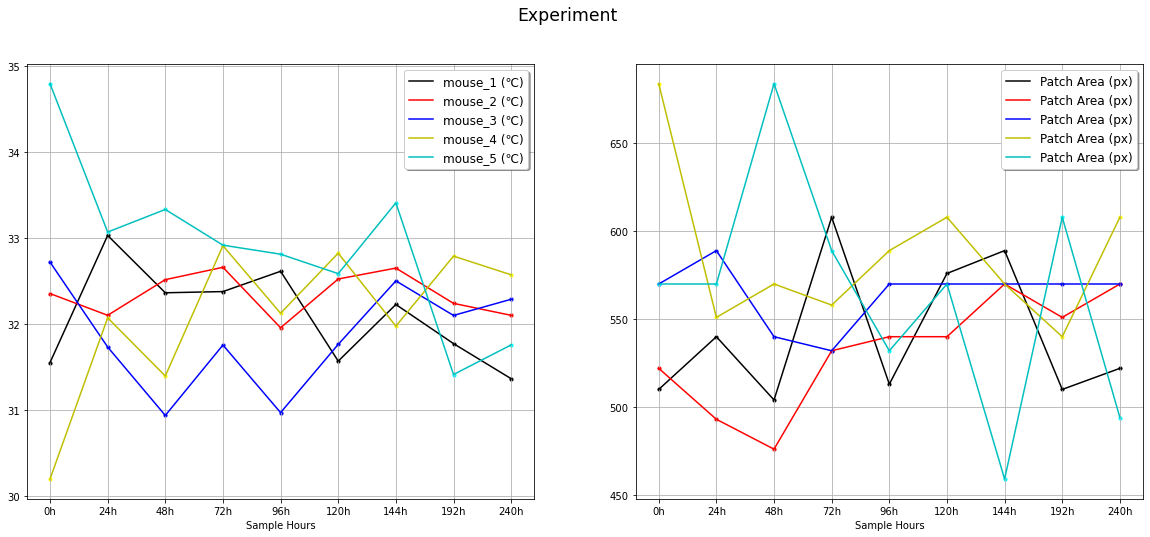

In [166]:
fig = plt.figure(figsize=(20, 8), constrained_layout=False)
fig.suptitle(t='Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])

ax.grid(True)
ax.plot(np.arange(0, 9, 1), mean_roi_temp1, 'k', label='mouse_1 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp1, c='black', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp2, 'r', label='mouse_2 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp2, c='red', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp3, 'b', label='mouse_3 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp3, c='blue', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp4, 'y', label='mouse_4 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp4, c='yellow', s=10)

ax.plot(np.arange(0, 9, 1), mean_roi_temp5, 'c', label='mouse_5 (℃)')
ax.scatter(np.arange(0, 9, 1), mean_roi_temp5, c='cyan', s=10)
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

ax = fig.add_subplot(grid[1])

ax.grid(True)
ax.plot(np.arange(0, 9, 1), roi_area_area1, 'k', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area1, c='black', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area2, 'r', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area2, c='red', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area3, 'b', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area3, c='blue', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area4, 'y', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area4, c='yellow', s=10)

ax.plot(np.arange(0, 9, 1), roi_area_area5, 'c', label='Patch Area (px)')
ax.scatter(np.arange(0, 9, 1), roi_area_area5, c='cyan', s=10)

ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

Για τη θερμογέννεση του φαιού λιπώδους ιστού χρειάζεται να 